In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
livecode_data = data[['GrLivArea','SalePrice']]

livecode_data.head()


,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


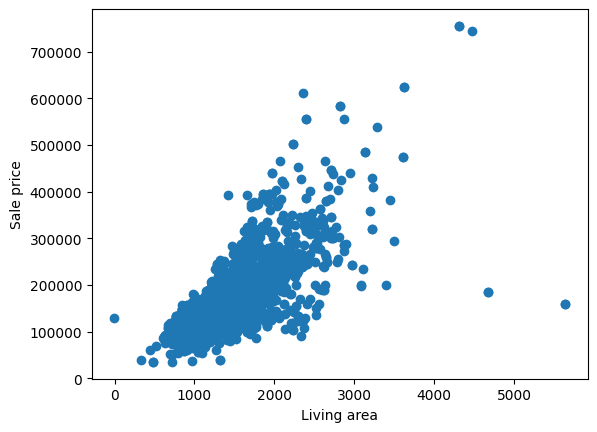

In [3]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()


In [4]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)


LinearRegression()

In [5]:
# View the model's slope (a)
model.coef_


array([105.00927564])

In [6]:
# View the model's intercept (b)
model.intercept_


22104.12101002081

LinearRegression uses the Coefficient of determination ( R^2) by default.

R^2 represents the proportion of the variance of the target explained by the features.
The score typically varies between 0 and 1
The higher score the better the model

In [7]:
# Evaluate the model's performance
model.score(X,y)


0.48960426399689116

In [8]:
#  Predict on new data using the trained model
model.predict([[1000]])


/Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([127113.39664561])

An apartment with an surface area of 1000  ft^2
  has a predicted value of about $125k.

❓ What did we do wrong when scoring the model's performance?

👉 We scored the model on the same data it was trained on!!

The Holdout Method:
The Holdout Method is used to evaluate a model's ability to generalize. It consists of splitting the dataset into two sets:

Training set (~70%)
Testing set (~30%)

In [9]:
livecode_data.head()


,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

# Ready X's and y's
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']


In [13]:
# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [14]:
# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Test data
model.score(X_test,y_test)


0.4916016021992454

In the above approach, we Lose information as:
The data in the Test set is not used to train the model
If we have a small dataset, that loss could be significant.
To solve this, we use Cross Validation.
</br></br>
__K-Fold Cross Validation__
The dataset is split into K number of folds
For each split, a sub model is trained and scored
The average score of all sub models is the cross-validated score of the model
</br></br>
ℹ Rule of thumb:  K=5 or 10

In [16]:
from sklearn.model_selection import cross_validate

# Instantiate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
print("The scores of each fold: ",cv_results['test_score'])

# Mean of scores
print("Mean score: ", cv_results['test_score'].mean())


The scores of each fold:  [0.55810657 0.52593307 0.50430916 0.3911751  0.45203221]
Mean score:  0.4863112208425962


__The Bias / Variance tradeoff__
For a model to generalize there will be a tradeoff between bias and variance.
</br></br>
__Bias (Underfitting)__: The inability for an algorithm to learn the patterns within a dataset.
</br>
__Variance (Overfitting)__: The algorithm generates an overly complex relationship when modeling patterns within a dataset.</br>
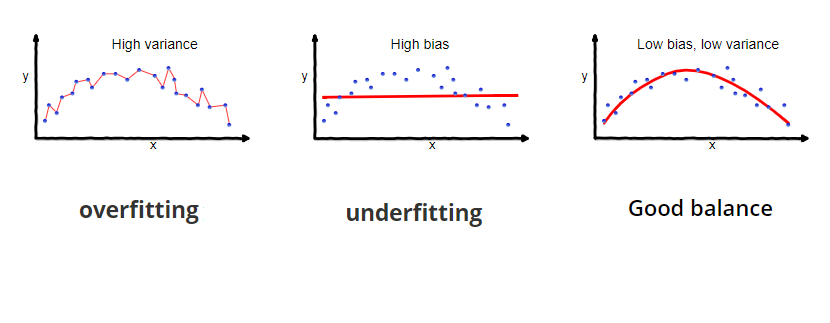


_Ideal curves_:
- High score on training set
- High score on test set
- Converged curves


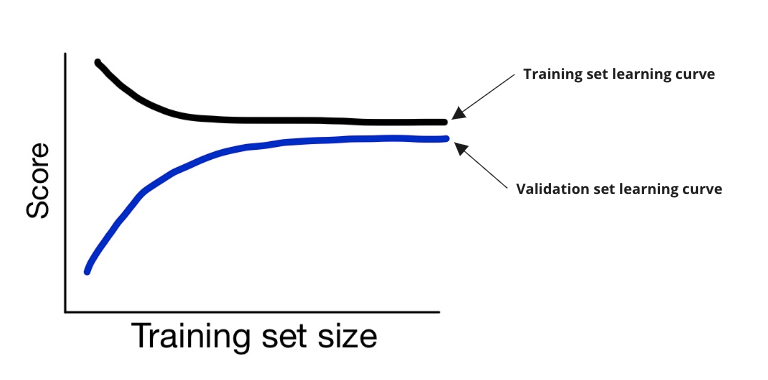

__Learning Curves with Sklearn__</br>
Let's plot and read the learning curves for our Regression model on house prices.

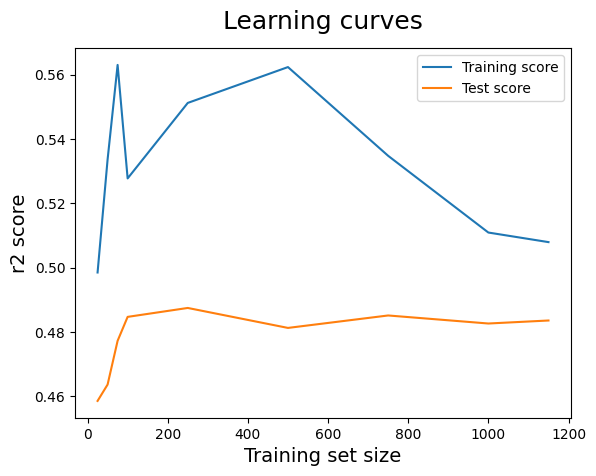

In [17]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()
